In [1]:
# import the data from csv file

import pandas as pd
df=pd.read_csv("ChurnData.csv")
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


churn
0.0    142
1.0     58
Name: churn, dtype: int64


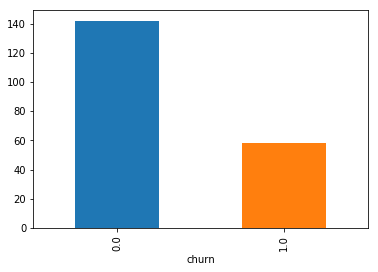

In [3]:
# Visualize the data and group by the categories

import matplotlib.pyplot as plt
%matplotlib inline

data=df.groupby('churn').churn.count()
print(data)
data.plot.bar()
plt.show()

In [23]:
# find the best features out of all the features present in the csv

X=df.drop('churn',axis=1)
y=df[['churn']]
from sklearn.feature_selection import chi2, SelectKBest
X=SelectKBest(chi2, k=6).fit_transform(X, y)
print(X[:5])

[[  11.    136.      0.     42.    211.45  125.  ]
 [  33.     33.      0.    288.8     0.      0.  ]
 [  23.     30.      0.    157.05    0.      0.  ]
 [  38.     76.     50.1   239.55 1873.05  880.  ]
 [   7.     80.      0.     47.45  166.1   145.  ]]


In [24]:
# All the columns are in numeric form so we will normalize the data using preprocessing. 

from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit(X).transform(X.astype('float'))
print(X[:5])
print(y[:5])

[[-1.13518441  0.4751423  -0.80905935 -0.71940664 -0.36132818 -0.55974431]
 [-0.11604313 -0.32886061 -0.80905935 -0.38801572 -0.61983235 -0.69284848]
 [-0.57928917 -0.35227817 -0.80905935 -0.56492315 -0.61983235 -0.69284848]
 [ 0.11557989  0.00679109  1.75909826 -0.4541462   1.6700292   0.24420489]
 [-1.32048283  0.03801451 -0.80905935 -0.71208865 -0.41676996 -0.53844764]]
   churn
0    1.0
1    1.0
2    0.0
3    0.0
4    0.0


In [26]:
# Data is all set. Lets create train and test data 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(150, 6) (50, 6)
(150, 1) (50, 1)


In [29]:
# Lets call the Logistic Regression model 

from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(C=0.01)
clf.fit(X_train,y_train)

C:\Users\Manav\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
# lets test the data on the trained model

y_pred=clf.predict(X_test)
y_pred_prob=clf.predict_proba(X_test)
print(y_pred[:5])

[1. 0. 0. 0. 1.]


## Evaluation metrics

In [31]:
# 1. Jaccard similarity

from sklearn.metrics import jaccard_similarity_score
print(jaccard_similarity_score(y_test,y_pred))

0.76


In [33]:
# 2. Confusion metrics

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[30  7]
 [ 5  8]]


In [34]:
# 3 log loss

from sklearn.metrics import log_loss
print(log_loss(y_test,y_pred_prob))

0.6028383414755569


In [36]:
# calculate the precision and recall 

from sklearn.metrics import precision_score,recall_score,f1_score
prec=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=2*prec*recall/(prec+recall)
print(f1)
print(f1_score(y_test,y_pred))

0.5714285714285715
0.5714285714285715


## lets calculate the best value of C for which the f1 score is best

[0.1, 0.01, 0.001, 0.0001, 1e-05]
The max score is:  0.5714285714285715
The max score is found at C= 0.01


C:\Users\Manav\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


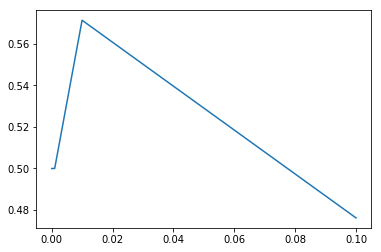

In [50]:
score=[]
c_value=[10**(-v) for v in range(1,6)]
print(c_value)
for v in c_value:
    clf=LogisticRegression(C=v)
    clf.fit(X_train,y_train)
    score.append(f1_score(y_test,clf.predict(X_test)))
print("The max score is: ",max(score))
print("The max score is found at C=", c_value[score.index(max(score))])

plt.plot(c_value,score)
plt.show()

## lets change the count of feature selections. 

C:\Users\Manav\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Manav\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


The max score is:  0.6666666666666667
The max score is found with the feature count= 5


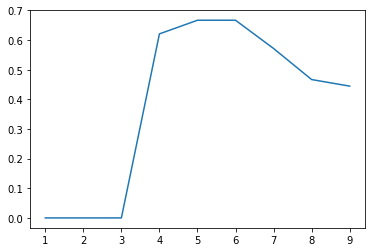

In [56]:
score=[]

for i in range(1,10):
    X=df.drop('churn',axis=1)
    y=df[['churn']]
    X=SelectKBest(chi2, k=i).fit_transform(X, y)
    X=StandardScaler().fit(X).transform(X.astype('float'))
    X_train,X_test,y_train,y_test=train_test_split(X,y)
    clf=LogisticRegression(C=0.01)
    clf.fit(X_train,y_train)
    score.append(f1_score(y_test,clf.predict(X_test)))
print("The max score is: ",max(score))
print("The max score is found with the feature count=", score.index(max(score)))

plt.plot(range(1,10),score)
plt.show()
    